# **Clustering **

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

# Data processing

In [44]:
iris=load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [45]:
df['Speices']=iris.target

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Speices            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [47]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Speices
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### dropping Targer

In [48]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Speices              0
dtype: int64

In [49]:
df.drop(['Speices'],axis=1,inplace=True)

In [50]:
df.shape

(150, 4)

In [51]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### PCA

In [52]:
pca=PCA(n_components=2)
pca_result=pca.fit_transform(df)

In [53]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [54]:
pca_result.shape

(150, 2)

In [55]:
df.shape

(150, 4)

## Distance of pc from point

In [56]:
distance_list=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(pca_result)
    distance_list.append(kmeans.inertia_)

### Displaying Distance
### Elbow method

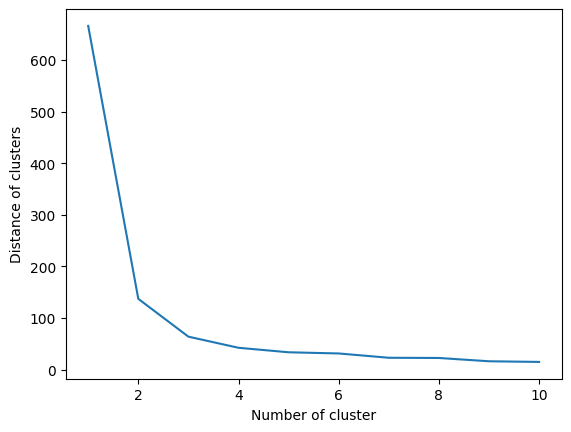

In [57]:
plt.plot(range(1,11),distance_list)
plt.xlabel("Number of cluster")
plt.ylabel("Distance of clusters")
plt.show()

### KMeans Clustering

In [58]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(pca_result)

KMeans(n_clusters=3)

In [59]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

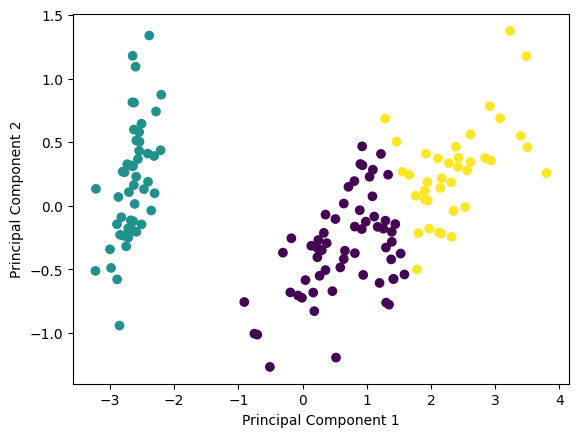

In [61]:
plt.scatter(pca_result[:,0],pca_result[:,1],c=kmeans.labels_)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### DBSCAN

In [79]:
dbscan=DBSCAN(eps=1,min_samples=10)
dbscan.fit(pca_result)

DBSCAN(eps=1, min_samples=10)

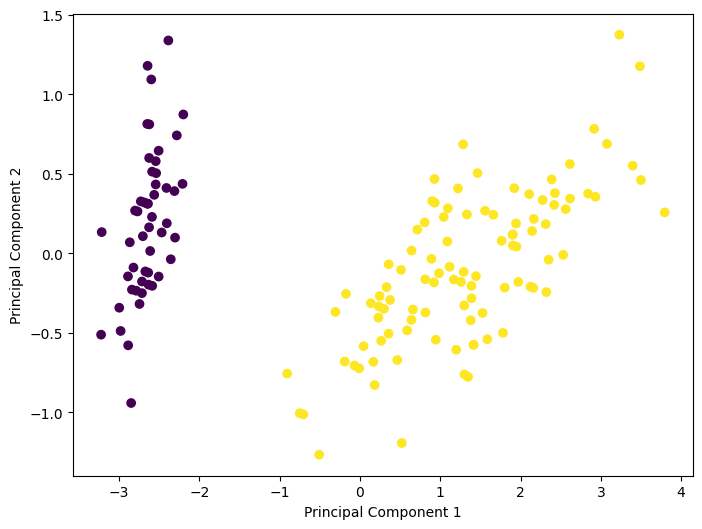

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0],pca_result[:,1],c=dbscan.labels_)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## Corelation HeatMap

In [81]:
iris_corr=df.corr()

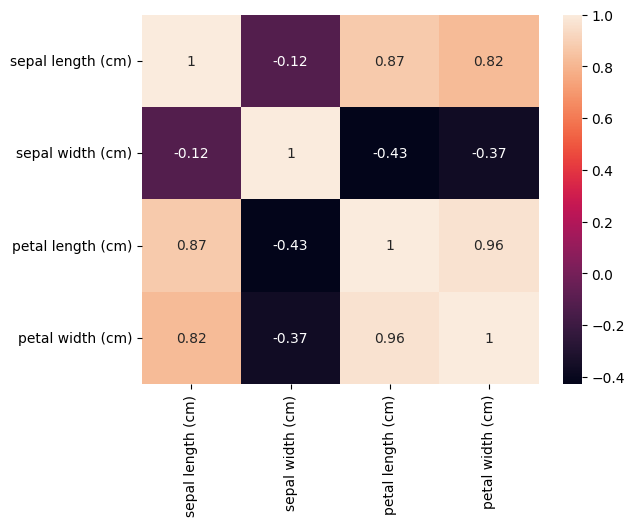

In [83]:
sns.heatmap(iris_corr,annot=True)
plt.show()